In [1]:
#|hide
#| eval: false
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [2]:
from fastai.vision.all import *
import os

In [3]:
path = '/Users/limenxi/Documents/vegetables'
files = get_image_files('/Users/limenxi/Documents/vegetables/B_training_set')
len(files)

100

In [4]:
def label_func(f): return f[0].isupper()

In [5]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(480))

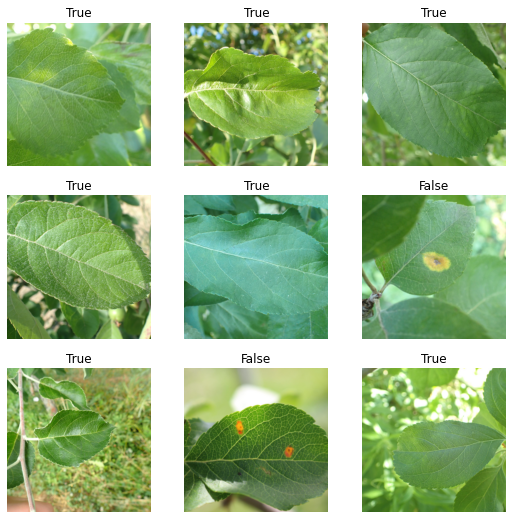

In [6]:
dls.show_batch()

In [7]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

/Users/limenxi/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/limenxi/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
[W NNPACK.cpp:53] Could not initialize NNPACK! Reason: Unsupported hardware.


epoch,train_loss,valid_loss,accuracy,time
0,1.298354,0.845883,0.600000,01:36


epoch,train_loss,valid_loss,accuracy,time
0,1.702973,0.575024,0.650000,02:24
1,1.453525,0.404880,0.800000,02:42
2,1.123984,0.451550,0.800000,02:34
3,0.888953,0.502632,0.800000,02:31
4,0.722240,0.508728,0.800000,02:37


In [8]:
test = '/Users/limenxi/Documents/vegetables/A_test_set/'
results = 0
healthy = 0

for image in os.scandir(test):
  if str(image)[11].isupper() and learn.predict(test + str(image)[11:-2])[0] == 'True':
    results += 1
    healthy += 1
  elif str(image)[11].islower() and learn.predict(test + str(image)[11:-2])[0] == 'False':
    results += 1

print(f'Overall accuracy: {results}%')
print(f'Healthy accuracy: {healthy * 2}%')
print(f'Rusted accuracy: {(results - healthy) * 2}%')

Overall accuracy: 72%
Healthy accuracy: 100%
Rusted accuracy: 44%


In [9]:
files2 = get_image_files('/Users/limenxi/Documents/vegetables/C_expanded_training_set')
dls2 = ImageDataLoaders.from_name_func(path, files2, label_func, item_tfms=Resize(480))
learn2 = vision_learner(dls2, resnet34, metrics=accuracy)
learn2.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.669746,0.153198,0.922222,18:38


epoch,train_loss,valid_loss,accuracy,time
0,0.111419,0.029561,0.994444,27:13
1,0.065165,0.012009,0.994444,28:14
2,0.047759,0.004417,1.000000,29:28
3,0.033145,0.004193,1.000000,29:43
4,0.024110,0.004478,1.000000,31:56


In [10]:
test = '/Users/limenxi/Documents/vegetables/A_test_set/'
results = 0
healthy = 0

for image in os.scandir(test):
  if str(image)[11].isupper() and learn2.predict(test + str(image)[11:-2])[0] == 'True':
    results += 1
    healthy += 1
  elif str(image)[11].islower() and learn2.predict(test + str(image)[11:-2])[0] == 'False':
    results += 1

print(f'Overall accuracy: {results}%')
print(f'Healthy accuracy: {healthy * 2}%')
print(f'Rusted accuracy: {(results - healthy) * 2}%')

Overall accuracy: 100%
Healthy accuracy: 100%
Rusted accuracy: 100%
